In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
file = files.upload()

Saving Thesis_data.csv to Thesis_data.csv


# Importing the Required Libraries

# Importing the Dataset

In [3]:
data = pd.read_csv('Thesis_data.csv')

In [6]:
data.head()

,Performance,Gender,Caste,Coaching,Time,X_education,XII_education,Medium,X_performance,XII_performance,Father_Occupation,Mother_Occupation
0,'Excellent','male','General','NO','ONE','SEBA','AHSEC','ENGLISH','Excellent','Excellent','DOCTOR','OTHERS'
1,'Excellent','male','OBC','WA','TWO','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','HOUSE_WIFE'
2,'Excellent','male','OBC','OA','TWO','OTHERS','CBSE','ENGLISH','Excellent','Excellent','BUSINESS','HOUSE_WIFE'
3,'Excellent','male','General','WA','ONE','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','SCHOOL_TEACHER'
4,'Excellent','male','General','OA','TWO','SEBA','CBSE','ENGLISH','Excellent','Excellent','COLLEGE_TEACHER','HOUSE_WIFE'


In [15]:
data[['Performance']].value_counts()

Performance
'Good'         210
'Vg'           198
'Average'      157
'Excellent'    101
dtype: int64

In [ ]:
#data.duplicated().sum()

In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
len(data)

666

# Looking at our dataset information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Performance        666 non-null    object
 1    Gender            666 non-null    object
 2   Caste              666 non-null    object
 3   Coaching           666 non-null    object
 4   Time               666 non-null    object
 5   X_education        666 non-null    object
 6   XII_education      666 non-null    object
 7   Medium             666 non-null    object
 8   X_performance      666 non-null    object
 9   XII_performance    666 non-null    object
 10  Father_Occupation  666 non-null    object
 11  Mother_Occupation  666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


# The countplot of our Target Variable

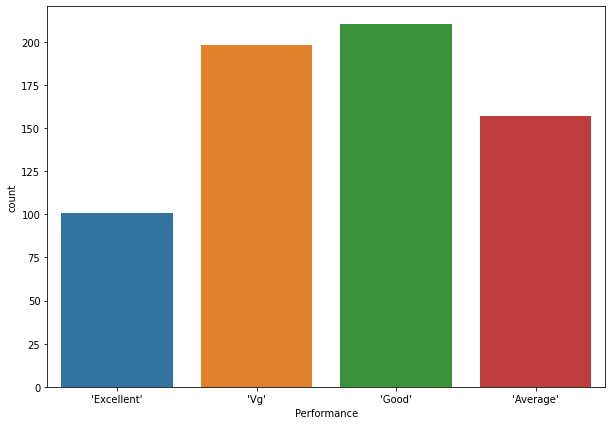

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['Performance'])
plt.show()

# looking at the columns (features) of our dataset

In [ ]:
data.columns

Index(['Performance', ' Gender', 'Caste', 'Coaching', 'Time', 'X_education',
       'XII_education', 'Medium', 'X_performance', 'XII_performance',
       'Father_Occupation', 'Mother_Occupation'],
      dtype='object')

# Applying One Hot Encoding (creating Dummy variable) on the nominal categorical features

In [16]:
df = pd.get_dummies(data[[' Gender','Caste','Coaching','X_education', 'XII_education', 'Medium','Father_Occupation', 'Mother_Occupation']], 
                    prefix_sep='_', drop_first=True)

In [ ]:
df.head()

,Gender_'male',Caste_'OBC',Caste_'SC',Caste_'ST',Coaching_'OA',Coaching_'WA',X_education_'OTHERS',X_education_'SEBA',XII_education_'CBSE',XII_education_'OTHERS',Medium_'ENGLISH',Medium_'OTHERS',Father_Occupation_'BUSINESS',Father_Occupation_'COLLEGE_TEACHER',Father_Occupation_'CULTIVATOR',Father_Occupation_'DOCTOR',Father_Occupation_'ENGINEER',Father_Occupation_'OTHERS',Father_Occupation_'SCHOOL_TEACHER',Mother_Occupation_'BUSINESS',Mother_Occupation_'COLLEGE_TEACHER',Mother_Occupation_'CULTIVATOR',Mother_Occupation_'DOCTOR',Mother_Occupation_'ENGINEER',Mother_Occupation_'HOUSE_WIFE',Mother_Occupation_'OTHERS',Mother_Occupation_'SCHOOL_TEACHER'
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data['Performance'].unique()

array(["'Excellent'", "'Vg'", "'Good'", "'Average'"], dtype=object)

In [ ]:
data['Time'].unique()

array(["'ONE'", "'TWO'", "'THREE'", "'FOUR'", "'FIVE'", "'SEVEN'"],
      dtype=object)

In [ ]:
data['X_performance'].unique()

array(["'Excellent'", "'Vg'", "'Good'", "'Average'"], dtype=object)

In [ ]:
data['XII_education'].unique()

array(["'AHSEC'", "'CBSE'", "'OTHERS'"], dtype=object)

# Applying Label Enconding on Ordinal Categorical features

In [17]:
y = data['Performance'].map({"'Excellent'": 4, "'Vg'":3, "'Good'":2, "'Average'":1})
time = data['Time'].map({"'ONE'":1, "'TWO'":2, "'THREE'":3, "'FOUR'":4, "'FIVE'":5, "'SEVEN'":7})
X_edu = data['X_performance'].map({"'Excellent'": 3, "'Vg'":2, "'Good'":1, "'Average'":0})
XII_edu = data['XII_performance'].map({"'Excellent'": 3, "'Vg'":2, "'Good'":1, "'Average'":0})

# Adding label encoded features on the dataset

In [18]:
df['Time'] = time
df['X_edu'] = X_edu
df['XII_edu']=XII_edu

In [ ]:
df.head()

,Gender_'male',Caste_'OBC',Caste_'SC',Caste_'ST',Coaching_'OA',Coaching_'WA',X_education_'OTHERS',X_education_'SEBA',XII_education_'CBSE',XII_education_'OTHERS',Medium_'ENGLISH',Medium_'OTHERS',Father_Occupation_'BUSINESS',Father_Occupation_'COLLEGE_TEACHER',Father_Occupation_'CULTIVATOR',Father_Occupation_'DOCTOR',Father_Occupation_'ENGINEER',Father_Occupation_'OTHERS',Father_Occupation_'SCHOOL_TEACHER',Mother_Occupation_'BUSINESS',Mother_Occupation_'COLLEGE_TEACHER',Mother_Occupation_'CULTIVATOR',Mother_Occupation_'DOCTOR',Mother_Occupation_'ENGINEER',Mother_Occupation_'HOUSE_WIFE',Mother_Occupation_'OTHERS',Mother_Occupation_'SCHOOL_TEACHER',Time,X_edu,XII_edu
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,3,3
1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,3,3
2,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,3,3
3,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,3,3
4,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,3,3


In [37]:
y.value_counts().sort_values()

4    101
1    157
3    198
2    210
Name: Performance, dtype: int64

In [38]:
data['Performance'].value_counts()

'Good'         210
'Vg'           198
'Average'      157
'Excellent'    101
Name: Performance, dtype: int64

In [41]:
np.unique(y_res, return_counts=True)

(array([1, 2, 3, 4]), array([203, 188, 193, 198]))

In [42]:
pd.DataFrame({'Performance':['Average','Good', 'Vg', "Excellent"], 'Mapping':[1,2,3,4], 'Value_Count':[157,210,198,101], 'balanced':[203,188,193,198]})

,Performance,Mapping,Value_Count,balanced
0,Average,1,157,203
1,Good,2,210,188
2,Vg,3,198,193
3,Excellent,4,101,198


# fixing imbalance dataset

In [20]:
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
smk = SMOTETomek()
X_res, y_res = smk.fit_sample(df, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [28]:
np.unique(y_res, return_counts=True)

(array([1, 2, 3, 4]), array([203, 188, 193, 198]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


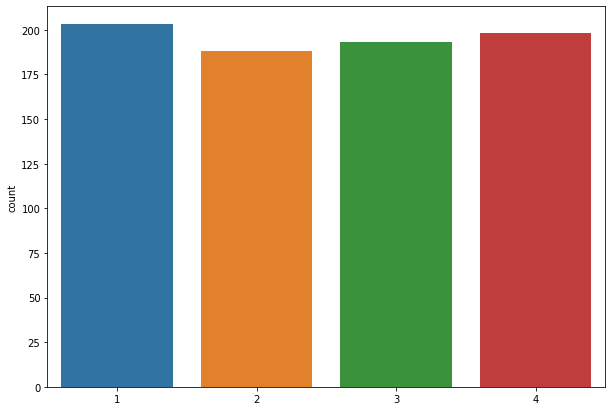

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(y_res)
plt.show()

# Splitting the dataset into Training set and Testing set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

# Modeling the data using Decision Tree and Random Forest before feature encoding

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators= 1898, min_samples_split= 18, min_samples_leaf= 3, 
                                       max_features= 'auto', max_depth= 2527, criterion= 'gini')

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2527, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=1898,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_classifier.score(X_train, y_train)

0.7419871794871795

In [ ]:
rf_classifier.score(X_test, y_test)

0.6282051282051282

In [ ]:
rf_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           1       0.82      0.72      0.77        39
           2       0.49      0.46      0.47        39
           3       0.45      0.49      0.47        39
           4       0.67      0.73      0.70        41

    accuracy                           0.60       158
   macro avg       0.61      0.60      0.60       158
weighted avg       0.61      0.60      0.60       158

AxesSubplot(0.125,0.125;0.62x0.755)


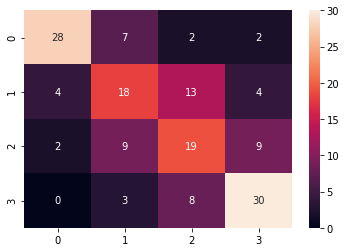

In [ ]:
#print(classification_report(y_test, rf_pred))
#print(sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True))

In [ ]:
print(rf_classifier.score(X_train, y_train))

0.938610662358643


In [ ]:
dt_classifer = DecisionTreeClassifier(splitter= 'random', min_samples_split= 8, min_samples_leaf= 1, max_features= None, max_depth= 2750, 
                                      criterion= 'gini')

In [ ]:
dt_classifer.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2750, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
dt_classifer.score(X_train, y_train)

0.8092948717948718

In [ ]:
dt_pred = dt_classifer.predict(X_test)

In [ ]:
dt_classifer.score(X_train, y_train)

0.938610662358643

              precision    recall  f1-score   support

           1       0.83      0.64      0.72        39
           2       0.43      0.57      0.49        40
           3       0.45      0.43      0.44        35
           4       0.75      0.71      0.73        42

    accuracy                           0.60       156
   macro avg       0.62      0.59      0.60       156
weighted avg       0.62      0.60      0.60       156

AxesSubplot(0.125,0.125;0.62x0.755)


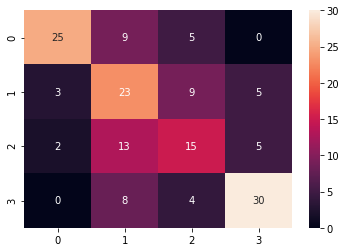

In [ ]:
print(classification_report(y_test, dt_pred))
print(sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True))

In [46]:
et_classifier = ExtraTreesClassifier()

In [47]:
et_classifier.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [48]:
et_pred = et_classifier.predict(X_test)

In [49]:
print(classification_report(y_test, et_pred))
print(sns.heatmap(confusion_matrix(y_test, et_pred), annot=True))

NameError: ignored

# Feature Selection Using Random Forest

In [ ]:
feat_imp = pd.DataFrame({'features':df.columns, 'imp':rf_classifier.feature_importances_})

# top 10 feature according to Random Forest Classifier

In [ ]:
imp_feat = feat_imp.nlargest(10, 'imp')

In [ ]:
imp_feat

,features,imp
3,Caste_'ST',0.149579
27,Time,0.080942
0,Gender_'male',0.071130
29,XII_edu,0.068885
5,Coaching_'WA',0.052718
1,Caste_'OBC',0.047844
17,Father_Occupation_'OTHERS',0.047070
28,X_edu,0.045274
24,Mother_Occupation_'HOUSE_WIFE',0.041615
8,XII_education_'CBSE',0.039340


<BarContainer object of 10 artists>

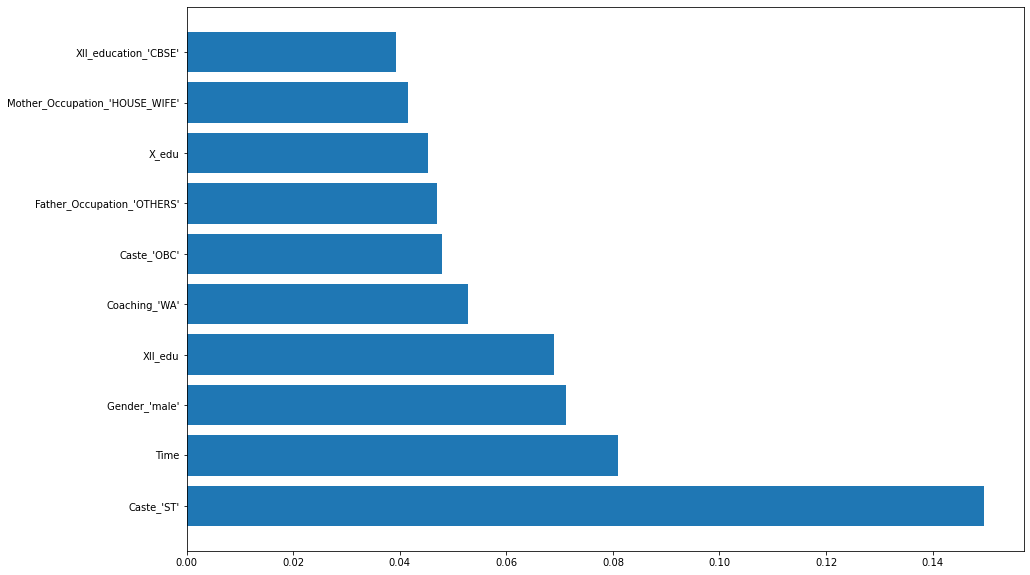

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(imp_feat['features'], imp_feat['imp'])

# Feature Selection Using ExtraTreesClassifier

In [ ]:
et_classifier.feature_importances_

array([0.06282122, 0.04787997, 0.03538439, 0.17379422, 0.0211466 ,
       0.05390591, 0.01070252, 0.03646131, 0.03853055, 0.00258112,
       0.0300427 , 0.02208704, 0.02955612, 0.01230599, 0.00994175,
       0.01781399, 0.01602892, 0.04245403, 0.02600321, 0.00155808,
       0.00929735, 0.00042922, 0.00522026, 0.00258478, 0.03980913,
       0.02095778, 0.02751619, 0.08740937, 0.04531791, 0.07045837])

In [50]:
et_feature_imp = pd.DataFrame({'features':df.columns, 'imp':et_classifier.feature_importances_})

In [55]:
et_feature_imp.nlargest(29, 'imp')

,features,imp
3,Caste_'ST',0.168429
27,Time,0.093847
29,XII_edu,0.069615
0,Gender_'male',0.059948
5,Coaching_'WA',0.048060
1,Caste_'OBC',0.044730
28,X_edu,0.043983
8,XII_education_'CBSE',0.043756
2,Caste_'SC',0.043093
7,X_education_'SEBA',0.042627


In [52]:
et_imp_feat

,features,imp
3,Caste_'ST',0.168429
27,Time,0.093847
29,XII_edu,0.069615
0,Gender_'male',0.059948
5,Coaching_'WA',0.048060
1,Caste_'OBC',0.044730
28,X_edu,0.043983
8,XII_education_'CBSE',0.043756
2,Caste_'SC',0.043093
7,X_education_'SEBA',0.042627


# top 10 features according to Extra Tree Classifier

<BarContainer object of 10 artists>

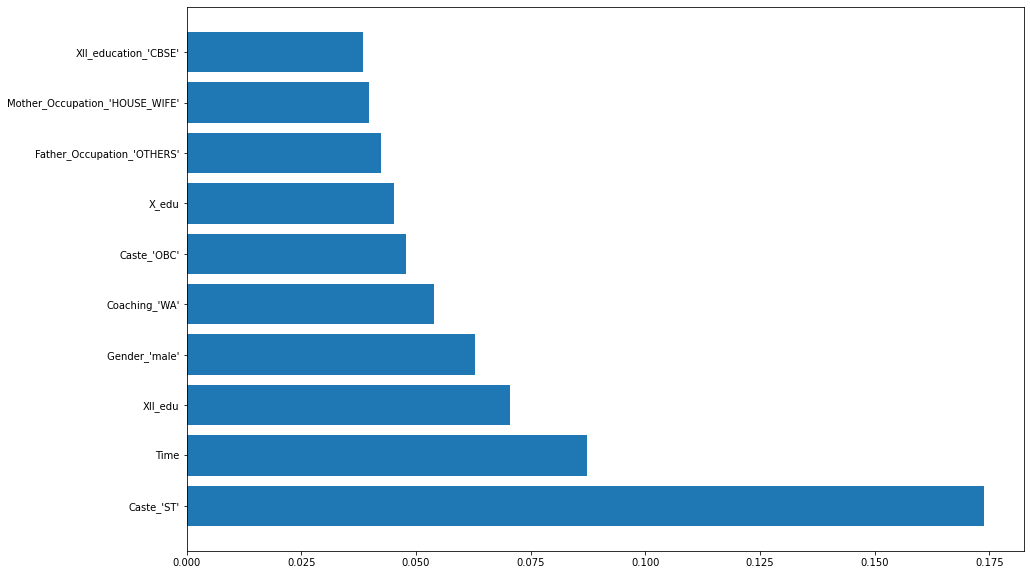

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(et_imp_feat['features'], et_imp_feat['imp'])

In [ ]:
# Selecting Features Using univariate Analysis

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
ordered_feature = SelectKBest(score_func=chi2, k=30)
ord_feat = ordered_feature.fit(df, y)

In [ ]:
feature_imp = pd.DataFrame({'features': df.columns, 'imp':ord_feat.scores_ })

In [ ]:
ord_feat.scores_

array([  2.31000612,  17.70105567,  22.83446115, 293.53492692,
        23.59145476,   3.1140116 ,   9.09675772,   2.68488268,
         2.07847418,   5.00749294,   0.63488086,  13.95667283,
         1.11029768,  22.46690446,  15.93759244,   5.28203443,
        10.86360442,   1.36335526,   5.75586091,   2.89886122,
        18.47655603,   2.36363636,   3.16087007,   7.09090909,
         1.06623593,   3.91584209,   1.83271816,   0.60700552,
         6.11931808,  14.62033603])

# top 10 features according to univariate analysis

In [ ]:
uni_imp_feat = feature_imp.nlargest(10, 'imp')

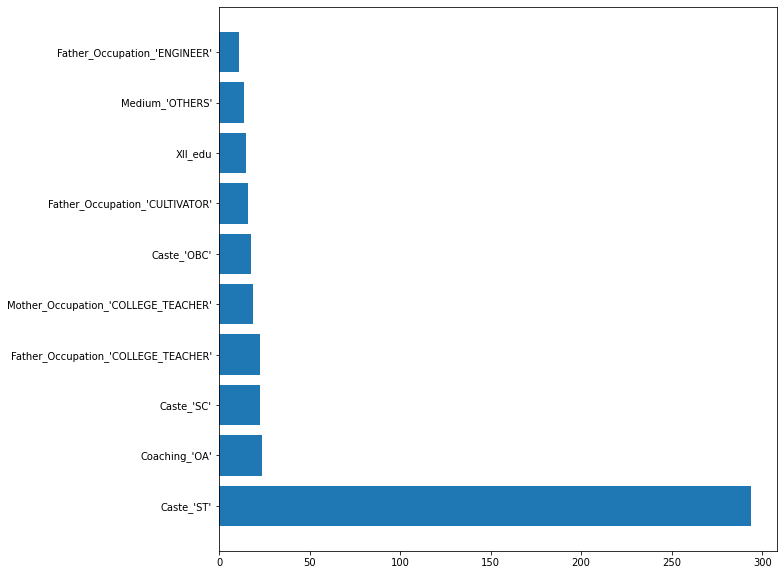

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(uni_imp_feat['features'], uni_imp_feat['imp'])
plt.show()

# Applying Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation of Random Forest Classifier

In [ ]:
cv_rf = cross_val_score(rf_classifier, X_train, y_train, scoring='accuracy', cv=10)

In [ ]:
cv_rf

array([0.59677419, 0.66129032, 0.53225806, 0.4516129 , 0.58064516,
       0.62903226, 0.70967742, 0.4516129 , 0.64516129, 0.68852459])

In [ ]:
cv_rf.mean()

0.5946589106292968

# Cross Validation of Decision Tree Classifier

In [ ]:
cv_dt = cross_val_score(dt_classifer, X_train, y_train, scoring='accuracy', cv=10)
cv_dt

array([0.56451613, 0.58064516, 0.5       , 0.46774194, 0.48387097,
       0.5483871 , 0.74193548, 0.5       , 0.64516129, 0.60655738])

In [ ]:
cv_dt.mean()

0.563881544156531

# Cross validation of Extra Tree Classifier

In [ ]:
cv_et = cross_val_score(et_classifier, X_train, y_train, scoring='accuracy', cv=10)
cv_et

array([0.65079365, 0.66666667, 0.58730159, 0.52380952, 0.65079365,
       0.61290323, 0.43548387, 0.61290323, 0.61290323, 0.5483871 ])

In [ ]:
cv_et.mean()

0.5901945724526371

# Standardizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()

In [ ]:
st_Xtrain = sc_X.fit_transform(X_train)
st_Xtest = sc_X.transform(X_test)

# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_classifier = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'liblinear')

In [ ]:
log_classifier.fit(st_Xtrain, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_classifier.score(st_Xtrain, y_train)

0.6522435897435898

In [ ]:
log_pred = log_classifier.predict(st_Xtest)

              precision    recall  f1-score   support

           1       0.76      0.72      0.74        39
           2       0.54      0.55      0.54        40
           3       0.38      0.43      0.41        35
           4       0.72      0.67      0.69        42

    accuracy                           0.60       156
   macro avg       0.60      0.59      0.59       156
weighted avg       0.61      0.60      0.60       156

AxesSubplot(0.125,0.125;0.62x0.755)


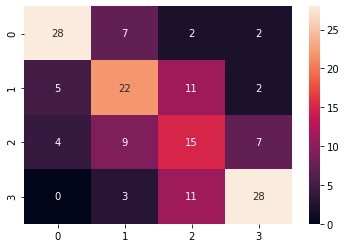

In [ ]:
print(classification_report(y_test, log_pred))
print(sns.heatmap(confusion_matrix(y_test, log_pred), annot=True))

In [ ]:
log_cv = cross_val_score(log_classifier, st_Xtrain, y_train, scoring='accuracy', cv=10)
log_cv

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

array([0.59677419, 0.61290323, 0.58064516, 0.53225806, 0.62903226,
       0.48387097, 0.64516129, 0.48387097, 0.5483871 , 0.6557377 ])

In [ ]:
log_cv.mean()

0.5768640930724485

# Applying K Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
mx_sc = MinMaxScaler()

In [ ]:
mx_Xtrain = mx_sc.fit_transform(X_train)
mx_Xtest = mx_sc.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(weights= 'distance', p= 1, n_neighbors= 33, leaf_size= 2923, algorithm= 'ball_tree')

In [ ]:
knn_classifier.fit(st_Xtrain, y_train)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=2923, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=1,
                     weights='distance')

In [ ]:
knn_classifier.score(st_Xtrain, y_train)

0.9407051282051282

In [ ]:
knn_pred = knn_classifier.predict(st_Xtest)

              precision    recall  f1-score   support

           1       0.74      0.64      0.68        39
           2       0.48      0.40      0.44        40
           3       0.46      0.49      0.47        35
           4       0.62      0.76      0.68        42

    accuracy                           0.58       156
   macro avg       0.57      0.57      0.57       156
weighted avg       0.58      0.58      0.57       156

AxesSubplot(0.125,0.125;0.62x0.755)


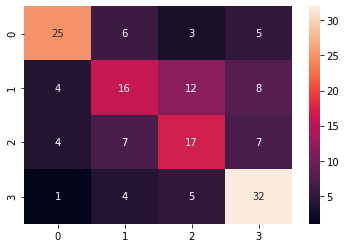

In [ ]:
print(classification_report(y_test, knn_pred))
print(sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True))

In [ ]:
knn_cv = cross_val_score(knn_classifier, mx_Xtrain, y_train, scoring='accuracy', cv=10)
print(knn_cv)
print(knn_cv.mean())

[0.59677419 0.59677419 0.51612903 0.53225806 0.46774194 0.56451613
 0.5483871  0.48387097 0.5483871  0.62295082]
0.5477789529349552


# Applying Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(C= 100, degree= 1, kernel= 'poly', probability=True)
svm_classifier.fit(st_Xtrain, y_train)
print('train_accuracy:', svm_classifier.score(st_Xtrain, y_train))


train_accuracy: 0.6746794871794872


In [ ]:
svm_pred = svm_classifier.predict(st_Xtest)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       0.89      0.79      0.84        39
           2       0.57      0.68      0.62        40
           3       0.36      0.40      0.38        35
           4       0.71      0.60      0.65        42

    accuracy                           0.62       156
   macro avg       0.63      0.62      0.62       156
weighted avg       0.64      0.62      0.63       156



In [ ]:
svm_pred = svm_classifier.predict(st_Xtest)

              precision    recall  f1-score   support

           1       0.89      0.79      0.84        39
           2       0.57      0.68      0.62        40
           3       0.36      0.40      0.38        35
           4       0.71      0.60      0.65        42

    accuracy                           0.62       156
   macro avg       0.63      0.62      0.62       156
weighted avg       0.64      0.62      0.63       156

AxesSubplot(0.125,0.125;0.62x0.755)


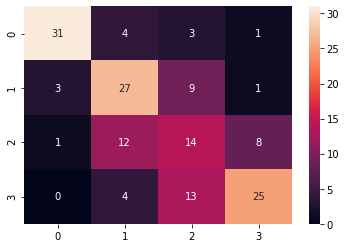

In [ ]:
print(classification_report(y_test, svm_pred))
print(sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True))

In [ ]:
svm_cv = cross_val_score(svm_classifier, st_Xtrain, y_train, scoring='accuracy', cv=10)
print(svm_cv)
print(svm_cv.mean())

[0.56451613 0.62903226 0.66129032 0.48387097 0.64516129 0.53225806
 0.62903226 0.61290323 0.61290323 0.63934426]
0.6010312004230566


# Applying naive bayes algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_classifier = GaussianNB()

In [ ]:
nb_classifier.fit(st_Xtrain, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_classifier.score(st_Xtrain, y_train)

0.4983974358974359

In [ ]:
nb_pred = nb_classifier.predict(st_Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.84      0.54      0.66        39
           2       0.37      0.97      0.53        40
           3       0.00      0.00      0.00        35
           4       0.80      0.48      0.60        42

    accuracy                           0.51       156
   macro avg       0.50      0.50      0.45       156
weighted avg       0.52      0.51      0.46       156

AxesSubplot(0.125,0.125;0.62x0.755)


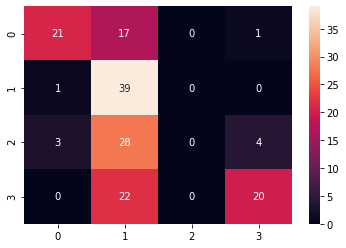

In [ ]:
print(classification_report(y_test, nb_pred))
print(sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True))

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
dt_prob = dt_classifer.predict_proba(X_test)

In [ ]:
dt_auc_score = roc_auc_score(y_test, dt_prob, multi_class='ovr')
dt_auc_score

0.7802133858363374

In [ ]:
nb_prob = nb_classifier.predict_proba(st_Xtest)
nb_auc_score = roc_auc_score(y_test, nb_prob, multi_class='ovr')
nb_auc_score

0.7609711162766419

In [ ]:
log_prob = log_classifier.predict_proba(st_Xtest)
log_auc_score = roc_auc_score(y_test, log_prob, multi_class='ovr')
log_auc_score

0.8226951111621525

In [ ]:
knn_prob = knn_classifier.predict_proba(st_Xtest)
knn_auc_score = roc_auc_score(y_test, knn_prob, multi_class='ovr')
knn_auc_score

0.7933661581540558

In [ ]:
svm_prob = svm_classifier.predict_proba(st_Xtest)
svm_auc_score = roc_auc_score(y_test, svm_prob, multi_class='ovr')
svm_auc_score

0.8160554584222555

In [ ]:
rf_prob = rf_classifier.predict_proba(X_test)
rf_auc_score = roc_auc_score(y_test, rf_prob, multi_class='ovr')
rf_auc_score

0.842213631242013

In [ ]:
nb_cv = cross_val_score(nb_classifier, st_Xtrain, y_train, scoring='accuracy', cv=10)
print(nb_cv)
print(nb_cv.mean())

[0.29032258 0.27419355 0.33870968 0.41935484 0.30645161 0.35483871
 0.4516129  0.35483871 0.38709677 0.50819672]
0.3685616076150185


In [ ]:
from hyperopt import hp, tpe, STATUS_OK, Trials, fmin

In [ ]:
space={'criterion':hp.choice('criterion', ['gini', 'entropy']),
       'max_depth':hp.quniform('max_depth', 10, 2000, 15),
       'max_features': hp.choice('max_features',['auto','sqrt','log2',None]),
       'min_samples_leaf':hp.uniform('min_samples_leaf', 0, 0.5),
       'min_samples_split':hp.uniform('min_samples_split', 0, 1),
       'n_estimators': hp.choice('n_estimators',[25, 50, 100, 150, 200, 400, 500, 800, 1000, 1200, 1500, 1800, 2000])
}

In [ ]:
def objective(space):
  model = RandomForestClassifier(n_estimators=space['n_estimators'], criterion=space['criterion'], max_depth=space['max_depth'],min_samples_split=space['min_samples_split'],
                                 min_samples_leaf=space['min_samples_leaf'], max_features=space['max_features'])
  accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
  return {'loss':accuracy, 'status':STATUS_OK}

In [ ]:
#trials=Trials()
#best = fmin(objective, space, algo= tpe.suggest, max_evals=80, trials=trials)
#best

In [ ]:
crit = {0:'gini', 1:'entropy'}
feat = {0:'auto', 1:'sqrt',2:'log2',3:None}
est = {0:25, 1:50, 2:100, 3:150, 4:200, 5:400, 6:500, 7:800, 8:1000, 9:1200, 10:1500, 11:1800, 12:2000}

In [ ]:
#print(crit[best['criterion']])
#print(feat[best['max_features']])
#print(est[best['n_estimators']])

In [ ]:
#trained_rf = RandomForestClassifier(n_estimators=est[best['n_estimators']],criterion=crit[best['criterion']], max_depth=best['max_depth'], 
                                    #min_samples_leaf=best['min_samples_leaf'], max_features=feat[best['max_features']], 
                                    #min_impurity_decrease=best['min_samples_split'])
#trained_rf.fit(X_train, y_train)
#train_rf_predict = trained_rf.predict(X_test)
#print(confusion_matrix(y_test, train_rf_predict))
#print(classification_report(y_test, train_rf_predict))

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param = {'n_estimators':[int(x) for x in np.linspace(10,3000, 50)],
         'criterion':['gini', 'entropy'],
         'max_depth':[int(x) for x in np.linspace(10,3000, 50)],
         'min_samples_leaf':[ x for x in range(1,50)],
         'max_features':['auto','sqrt','log2',None],
         'min_samples_split': [x for x in range(2,100)]
         }

In [ ]:
random_cv = RandomizedSearchCV(rf_classifier, param, n_iter=80, cv=10, random_state=20)

In [ ]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=1268,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 315,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 17,
 'n_estimators': 986}

In [ ]:
random_cv.best_params_['n_estimators']

1268

In [ ]:
random_cv.best_score_

0.5472350230414746

              precision    recall  f1-score   support

           1       0.79      0.91      0.85        34
           2       0.46      0.42      0.44        38
           3       0.49      0.47      0.48        40
           4       0.81      0.80      0.80        44

    accuracy                           0.65       156
   macro avg       0.64      0.65      0.64       156
weighted avg       0.64      0.65      0.64       156

AxesSubplot(0.125,0.125;0.62x0.755)


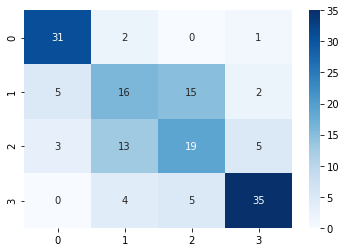

In [ ]:
random_pred = random_cv.predict(X_test)
print(classification_report(y_test, random_pred))
print(sns.heatmap(confusion_matrix(y_test, random_pred), annot=True, cmap='Blues'))

In [ ]:
dt_params = {'criterion':['gini', 'entropy'],
             'splitter':['best','random'],
             'max_depth':[int(x) for x in np.linspace(10,3000, 50)],
             'min_samples_leaf':[ 1,2,3,5,6,7,9,10,12,15,17, 19,20, 22,25,27, 28, 30, 33, 35, 38, 39, 41],
             'max_features':['auto','sqrt','log2',None],
             'min_samples_split': [2,3,4,5,7,8,9,11,13,15,17,18,20,22,23,25, 27, 28, 30]
             }

In [ ]:
dt_rcv = RandomizedSearchCV(dt_classifer, dt_params, n_iter=80, cv=10, random_state=20)
dt_rcv.fit(X_train, y_train)
print(dt_rcv.best_params_)
print(dt_rcv.best_score_)
dt_rcv_pred = dt_rcv.predict(X_test)

{'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 39, 'max_features': None, 'max_depth': 864, 'criterion': 'gini'}
0.5360983102918586


In [ ]:
svm_params = {'kernel':['poly','linear','rbf','sigmoid'],
              'C':[0.1,0.5,1,10,100,1000],
              'degree':[x for x in range(1,10)]
              }

In [ ]:
svm_gridcv = RandomizedSearchCV(svm_classifier, svm_params, cv=10, n_iter=80)
svm_gridcv.fit(st_Xtrain, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=80, n_jobs=None,
                   param_distributions={'C': [0.1, 0.5, 1, 10, 100, 1000],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'kernel': ['poly', 'linear', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(svm_gridcv.best_params_)
print(svm_gridcv.best_score_)
svm_gcv_pred = svm_gridcv.predict(st_Xtest)

{'kernel': 'rbf', 'degree': 2, 'C': 1}
0.6010312004230566


In [ ]:
print(classification_report(y_test, svm_gcv_pred))

              precision    recall  f1-score   support

           1       0.71      0.85      0.77        34
           2       0.38      0.34      0.36        38
           3       0.47      0.45      0.46        40
           4       0.70      0.68      0.69        44

    accuracy                           0.58       156
   macro avg       0.57      0.58      0.57       156
weighted avg       0.57      0.58      0.57       156



              precision    recall  f1-score   support

           1       0.71      0.85      0.77        34
           2       0.38      0.34      0.36        38
           3       0.47      0.45      0.46        40
           4       0.70      0.68      0.69        44

    accuracy                           0.58       156
   macro avg       0.57      0.58      0.57       156
weighted avg       0.57      0.58      0.57       156

AxesSubplot(0.125,0.125;0.62x0.755)


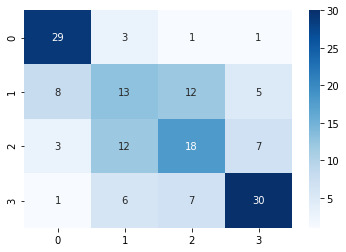

In [ ]:
print(classification_report(y_test, svm_gcv_pred))
print(sns.heatmap(confusion_matrix(y_test, svm_gcv_pred), annot=True, cmap='Blues'))

              precision    recall  f1-score   support

           1       0.71      0.85      0.77        34
           2       0.38      0.34      0.36        38
           3       0.47      0.45      0.46        40
           4       0.70      0.68      0.69        44

    accuracy                           0.58       156
   macro avg       0.57      0.58      0.57       156
weighted avg       0.57      0.58      0.57       156

AxesSubplot(0.125,0.125;0.62x0.755)


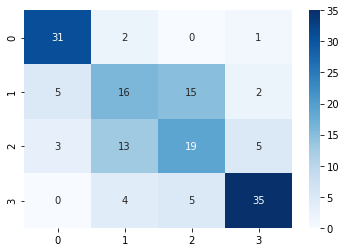

In [ ]:
print(classification_report(y_test, svm_gcv_pred))
print(sns.heatmap(confusion_matrix(y_test, random_pred), annot=True, cmap='Blues'))

In [ ]:
knn_params = {'n_neighbors': [ x for x in range(1,61)],
              'weights':['uniform','distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [int(x) for x in np.linspace(10, 3000, 40)],
              'p':[1,2]
              }

In [ ]:
knn_randomcv = RandomizedSearchCV(knn_classifier, knn_params, n_iter=80, cv=10, random_state=20)
knn_randomcv.fit(st_Xtrain, y_train)
print(knn_randomcv.best_params_)
print(knn_randomcv.best_score_)

{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 623, 'algorithm': 'ball_tree'}
0.5704389212057113


In [ ]:
knn_rcv_pred = knn_randomcv.predict(st_Xtest)

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        34
           2       0.45      0.37      0.41        38
           3       0.48      0.38      0.42        40
           4       0.65      0.84      0.73        44

    accuracy                           0.60       156
   macro avg       0.58      0.59      0.58       156
weighted avg       0.58      0.60      0.58       156

AxesSubplot(0.125,0.125;0.62x0.755)


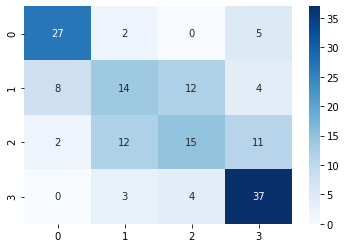

In [ ]:
print(classification_report(y_test, knn_rcv_pred))
print(sns.heatmap(confusion_matrix(y_test, knn_rcv_pred), annot=True, cmap='Blues'))

In [ ]:
log_params = {'penalty':['l1','l2'],
              'C':[0.1,1,10,100,1000],
              'solver':['liblinear','saga','lbfgs','newton-cg','sag']}
log_gridcv = GridSearchCV(log_classifier, log_params, cv=10, n_jobs=-1)
log_gridcv.fit(st_Xtrain, y_train)
log_gridcv.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
print(log_gridcv.best_score_)
log_gcv_pred = log_gridcv.predict(st_Xtest)

0.567741935483871


              precision    recall  f1-score   support

           1       0.74      0.91      0.82        34
           2       0.43      0.42      0.43        38
           3       0.45      0.45      0.45        40
           4       0.68      0.57      0.62        44

    accuracy                           0.58       156
   macro avg       0.57      0.59      0.58       156
weighted avg       0.57      0.58      0.57       156

AxesSubplot(0.125,0.125;0.62x0.755)


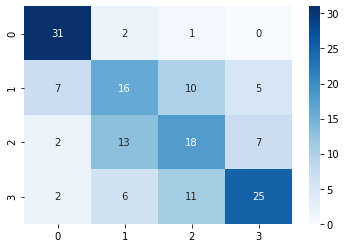

In [ ]:
print(classification_report(y_test, log_gcv_pred))
print(sns.heatmap(confusion_matrix(y_test, log_gcv_pred), annot=True, cmap='Blues'))

In [ ]:
params = {'n_estimators':[random_cv.best_params_['n_estimators'],random_cv.best_params_['n_estimators']+10, random_cv.best_params_['n_estimators']+20,
           random_cv.best_params_['n_estimators']+30, random_cv.best_params_['n_estimators']+40,random_cv.best_params_['n_estimators']+200,
           random_cv.best_params_['n_estimators']-200,random_cv.best_params_['n_estimators']+150, random_cv.best_params_['n_estimators']-150,
           random_cv.best_params_['n_estimators']-250,random_cv.best_params_['n_estimators']+250,],
         'criterion':[random_cv.best_params_['criterion']],
         'max_depth':[random_cv.best_params_['max_depth']],
         'min_samples_leaf':[random_cv.best_params_['min_samples_leaf']+1, random_cv.best_params_['min_samples_leaf']+2, random_cv.best_params_['min_samples_leaf']+3,
          random_cv.best_params_['min_samples_leaf']+5, random_cv.best_params_['min_samples_leaf']+6, random_cv.best_params_['min_samples_leaf']+7, random_cv.best_params_['min_samples_leaf']+8,
          random_cv.best_params_['min_samples_leaf']+9],
         'max_features':[random_cv.best_params_['max_features']],
         'min_samples_split': [random_cv.best_params_['min_samples_split']+1, random_cv.best_params_['min_samples_split']+2, random_cv.best_params_['min_samples_split']+3,
          random_cv.best_params_['min_samples_split']+5, random_cv.best_params_['min_samples_split']+9,random_cv.best_params_['min_samples_split']+10,random_cv.best_params_['min_samples_split']+7]
         }

In [ ]:
grid_cv = GridSearchCV(rf_classifier, params, cv=10, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [ ]:
print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1018,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'gini', 'max_depth': 3000, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1018}
0.5693548387096776
